In [49]:
# This script will generate input feature values on particular line (such as 39A). 
# For each line, there are 2 direictions, dirction 1 and direction 2

import csv
import pandas as pd
import numpy as np
prev_sample_df = pd.read_csv("LeaveTimesTrips_JUN.csv")

In [50]:
sample_df = prev_sample_df.copy()

In [51]:
Lines = sample_df.LineId.sort_values().unique()
# 39A, direction 1 or 2
sample_df = sample_df[(sample_df['LineId']=='39A') & (sample_df['Direction'] == 1)]
tripids = sample_df.TripId.sort_values().unique()
PN = sample_df.ProgrNumber.sort_values().unique()

In [52]:
print(PN)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


In [54]:
firstTripId = tripids[0]

In [55]:
stopPoints = []
for i in PN:
    stopid = sample_df[(sample_df['TripId'] == firstTripId) & (sample_df['ProgrNumber'] == i)].StopPointId.iloc[0]
    stopPoints.append(stopid)

In [56]:
useful_tripids = []
for tripid in tripids:
    isUsefull = True
    for pnumber in PN:
        if len(sample_df[(sample_df['TripId'] == tripid) & (sample_df['ProgrNumber'] == pnumber)]) == 0:
            isUsefull = False
            break
    if isUsefull:
        useful_tripids.append(tripid)

In [63]:
#print(stopTable)

{'007_P': 773, '073_P': 7162, '031_P': 1649, '020_P': 793, '022_P': 7586, '024_P': 7588, '060_P': 1899, '010_P': 776, '038_P': 1661, '039_P': 1662, '030_P': 1648, '047_P': 7025, '042_P': 1666, '055_P': 1875, '044_P': 7167, '053_P': 1873, '008_P': 774, '059_P': 1879, '061_P': 6107, '066_P': 7029, '014_P': 781, '018_P': 785, '045_P': 1808, '035_P': 1805, '002_P': 768, '056_P': 1876, '019_P': 786, '011_P': 777, '040_P': 1664, '006_P': 772, '029_P': 1647, '032_P': 1911, '041_P': 1665, '063_P': 6109, '064_P': 6110, '070_P': 7160, '071_P': 7047, '033_P': 1913, '058_P': 1878, '009_P': 775, '003_P': 769, '017_P': 784, '013_P': 780, '050_P': 1870, '016_P': 783, '015_P': 782, '028_P': 1445, '027_P': 1444, '068_P': 7011, '023_P': 7587, '037_P': 1660, '005_P': 771, '057_P': 1877, '026_P': 1443, '062_P': 6108, '012_P': 779, '034_P': 1914, '025_P': 328, '051_P': 1871, '065_P': 7020, '067_P': 7038, '004_P': 770, '048_P': 4464, '001_P': 767, '046_P': 7389, '072_P': 7161, '036_P': 1806, '021_P': 7576, 

In [64]:
count = 1
stopTable = {}
stopTable2 = {}
for stopid in stopPoints:
    stopTable['{}_P'.format(str(count).zfill(3))] = stopid
    stopTable2['{}_A'.format(str(count).zfill(3))] = stopid
    count += 1

In [65]:
df = pd.DataFrame(stopTable, index=[0])
df['tripid'] = '0'
df2 = pd.DataFrame(stopTable2, index=[0])
df2['tripid'] = '0'

In [66]:
sample_df[(sample_df['TripId'] == firstTripId)].StopPointId.unique()

array([1807, 1899, 7167, 6107, 1808, 6108, 7389, 6109, 7025, 6110, 4464,
       7020, 1869, 7029, 7038, 1870, 7011, 1914, 1871, 2171, 1805, 1872,
       7160, 1806, 1873, 7047, 1660, 1874, 1875, 7161, 1661, 1876, 7162,
       1662, 1877, 1664, 1878, 1665, 1666, 1879,  774,  328,  775, 1443,
        776, 1444,  777, 1445,  779, 1647, 1648,  780, 1649,  781, 1911,
        782, 1913,  783,  784,  785,  786,  767,  793,  768, 7576,  769,
       7586,  770, 7587,  771, 7588,  772,  773])

In [67]:
row = 0
for tripid in useful_tripids:
    plannedTimes = {}
    actualTimes = {}
    count = 1
    row += 1
    for stop in stopPoints:
        plannedTime = sample_df[(sample_df['StopPointId'] == stop) & (sample_df['TripId'] == tripid)].PlannedTime_Arr.iloc[0]
        actualTime = sample_df[(sample_df['StopPointId'] == stop) & (sample_df['TripId'] == tripid)].ActualTime_Arr.iloc[0]
        #print(tripid, stop, plannedTime)
        plannedTimes['{}_P'.format(str(count).zfill(3))] = plannedTime
        actualTimes['{}_A'.format(str(count).zfill(3))] = actualTime
        count += 1
    df = df.append(plannedTimes, ignore_index=True)
    df['tripid'].loc[row] = tripid
    df2 = df2.append(actualTimes, ignore_index=True)
    df2['tripid'].loc[row] = tripid
    #print("\n stopid ", stop, ":", plannedTime)
df = df.set_index('tripid')
df2 = df2.set_index('tripid')

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
df.head()

,001_P,002_P,003_P,004_P,005_P,006_P,007_P,008_P,009_P,010_P,...,064_P,065_P,066_P,067_P,068_P,069_P,070_P,071_P,072_P,073_P
tripid,,,,,,,,,,,,,,,,,,,,,
0,767.0,768.0,769.0,770.0,771.0,772.0,773.0,774.0,775.0,776.0,...,6110.0,7020.0,7029.0,7038.0,7011.0,2171.0,7160.0,7047.0,7161.0,7162.0
5002343,28200.0,28302.0,28339.0,28396.0,28419.0,28467.0,28500.0,28539.0,28592.0,28637.0,...,32131.0,32162.0,32174.0,32195.0,32224.0,32267.0,32276.0,32306.0,32326.0,32344.0
5003102,34800.0,34971.0,34997.0,35050.0,35071.0,35115.0,35168.0,35231.0,35316.0,35380.0,...,39004.0,39035.0,39047.0,39068.0,39097.0,39140.0,39149.0,39179.0,39199.0,39217.0
5003483,30000.0,30137.0,30165.0,30229.0,30255.0,30308.0,30357.0,30414.0,30492.0,30554.0,...,34185.0,34216.0,34228.0,34249.0,34278.0,34321.0,34330.0,34360.0,34380.0,34398.0
5003603,24000.0,24102.0,24139.0,24196.0,24219.0,24267.0,24300.0,24339.0,24392.0,24437.0,...,27931.0,27962.0,27974.0,27995.0,28024.0,28067.0,28076.0,28106.0,28126.0,28144.0


In [71]:
#df.to_csv("39A_b_research_plannedTimeTable.csv")
#df2.to_csv("39A_b_research_actualTimeTable.csv")

In [24]:
df = pd.read_csv("39A_b_research_plannedTimeTable.csv")
df2 = pd.read_csv("39A_b_research_actualTimeTable.csv")

In [106]:
plot_df = df[abs(df['001_P']-34200) == min(abs(df['001_P']-34200))]
plot_df2 = df2[abs(df2['001_A']-34200) == min(abs(df2['001_A']-34200))]

In [110]:
plot_df2

,001_A,002_A,003_A,004_A,005_A,006_A,007_A,008_A,009_A,010_A,...,064_A,065_A,066_A,067_A,068_A,069_A,070_A,071_A,072_A,073_A
tripid,,,,,,,,,,,,,,,,,,,,,
5084970,34206.0,34323.0,34362.0,34433.0,34441.0,34478.0,34513.0,34548.0,34647.0,34696.0,...,38707.0,38774.0,38786.0,38824.0,38893.0,38984.0,38988.0,39030.0,39055.0,39078.0


In [103]:
plot_df2

,001_A,002_A,003_A,004_A,005_A,006_A,007_A,008_A,009_A,010_A,...,064_A,065_A,066_A,067_A,068_A,069_A,070_A,071_A,072_A,073_A
tripid,,,,,,,,,,,,,,,,,,,,,
5108091,32422.0,32585.0,32630.0,32666.0,32703.0,32752.0,32811.0,32837.0,32877.0,32910.0,...,36609.0,36660.0,36673.0,36710.0,36776.0,36840.0,36848.0,36888.0,36918.0,36968.0


In [135]:
#df[(df['001_P']-25000 > 0) & (df['001_P']-25000) == min(df['001_P']-25000)]
#df[((df['001_P']-25000) > 0) & ((df['001_P']-25000) < 600)]
range_df = df[(df['001_P'] > 32400) & (df['001_P'] <= 34200)]
new_range_df = range_df.T
n_range_df = new_range_df.reset_index(drop=True)
n_range_df.index = n_range_df.index + 1

In [143]:
range_df2 = df2[(df2['001_A'] > 32400) & (df2['001_A'] <= 34200)]
new_range_df2 = range_df2.T
n_range_df2 = new_range_df2.reset_index(drop=True)
n_range_df2.index = n_range_df2.index + 1

In [144]:
n_range_df2.head()

tripid,5006287,5007154,5008528,5015235,5083721,5089301,5095350,5098559,5108091,5109095,5113477
1,34184.0,33370.0,33908.0,34061.0,34189.0,33691.0,33323.0,32407.0,32422.0,34139.0,33504.0
2,34304.0,33230.0,33998.0,34270.0,34295.0,33812.0,33413.0,32478.0,32585.0,34240.0,33631.0
3,34324.0,33248.0,34021.0,34311.0,34331.0,33851.0,33437.0,32533.0,32630.0,34289.0,33730.0
4,34358.0,33300.0,34058.0,34376.0,34368.0,33932.0,33472.0,32569.0,32666.0,34407.0,33740.0
5,34387.0,33337.0,34069.0,34417.0,34403.0,33967.0,33481.0,32579.0,32703.0,34442.0,33750.0


<Figure size 432x288 with 0 Axes>

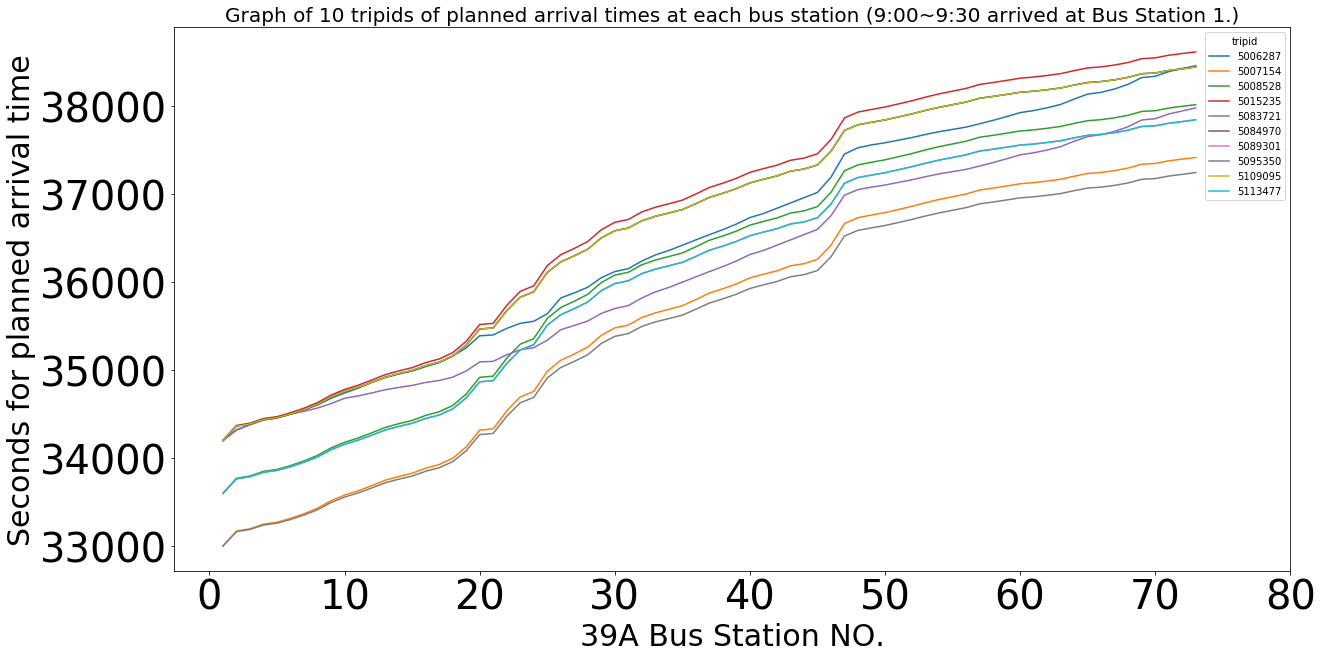

In [142]:
import matplotlib.pyplot as plt
plt.figure()
n_range_df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of 10 tripids of planned arrival times at each bus station (9:00~9:30 arrived at Bus Station 1.)', fontsize=20)
plt.xlabel('39A Bus Station NO.',fontsize=30)
plt.ylabel('Seconds for planned arrival time',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 90, 10))
plt.show()

<Figure size 432x288 with 0 Axes>

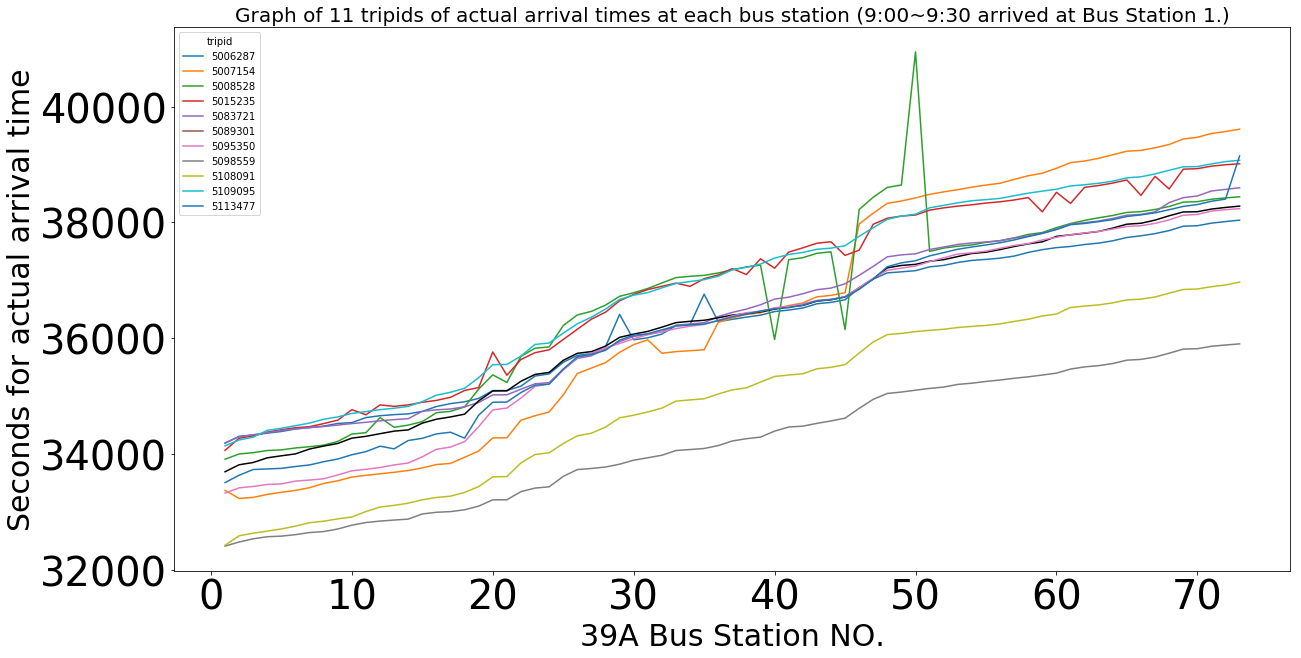

In [145]:
import matplotlib.pyplot as plt
plt.figure()
n_range_df2.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of 11 tripids of actual arrival times at each bus station (9:00~9:30 arrived at Bus Station 1.)', fontsize=20)
plt.xlabel('39A Bus Station NO.',fontsize=30)
plt.ylabel('Seconds for actual arrival time',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 80, 10))
plt.show()

In [81]:
df.sort_values(by='001_P')

,001_P,002_P,003_P,004_P,005_P,006_P,007_P,008_P,009_P,010_P,...,064_P,065_P,066_P,067_P,068_P,069_P,070_P,071_P,072_P,073_P
tripid,,,,,,,,,,,,,,,,,,,,,
0,767.0,768.0,769.0,770.0,771.0,772.0,773.0,774.0,775.0,776.0,...,6110.0,7020.0,7029.0,7038.0,7011.0,2171.0,7160.0,7047.0,7161.0,7162.0
5089952,24000.0,24098.0,24134.0,24189.0,24211.0,24257.0,24289.0,24326.0,24377.0,24420.0,...,27779.0,27808.0,27819.0,27839.0,27867.0,27908.0,27916.0,27945.0,27964.0,27985.0
5003603,24000.0,24102.0,24139.0,24196.0,24219.0,24267.0,24300.0,24339.0,24392.0,24437.0,...,27931.0,27962.0,27974.0,27995.0,28024.0,28067.0,28076.0,28106.0,28126.0,28144.0
5107734,24000.0,24098.0,24134.0,24189.0,24211.0,24257.0,24289.0,24326.0,24377.0,24420.0,...,27779.0,27808.0,27819.0,27839.0,27867.0,27908.0,27916.0,27945.0,27964.0,27985.0
5115289,24900.0,24998.0,25034.0,25089.0,25111.0,25157.0,25189.0,25226.0,25277.0,25320.0,...,28679.0,28708.0,28719.0,28739.0,28767.0,28808.0,28816.0,28845.0,28864.0,28885.0
5099869,24900.0,24998.0,25034.0,25089.0,25111.0,25157.0,25189.0,25226.0,25277.0,25320.0,...,28679.0,28708.0,28719.0,28739.0,28767.0,28808.0,28816.0,28845.0,28864.0,28885.0
5089162,25800.0,25924.0,25951.0,26005.0,26027.0,26072.0,26105.0,26144.0,26198.0,26245.0,...,29605.0,29634.0,29645.0,29665.0,29693.0,29734.0,29742.0,29771.0,29790.0,29811.0
5114119,25800.0,25924.0,25951.0,26005.0,26027.0,26072.0,26105.0,26144.0,26198.0,26245.0,...,29605.0,29634.0,29645.0,29665.0,29693.0,29734.0,29742.0,29771.0,29790.0,29811.0
5016042,25800.0,25929.0,25957.0,26013.0,26036.0,26083.0,26118.0,26159.0,26214.0,26263.0,...,29758.0,29789.0,29801.0,29822.0,29851.0,29894.0,29903.0,29933.0,29953.0,29971.0
